# AWS Rekognition Text Detection Test

In [7]:
import boto3
s3_resource = boto3.resource('s3')
client=boto3.client('rekognition')

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

IMAGE 1

In [50]:
bucket='secondpythonbucket6ce9cccf-c429-471c-99a1-f36e849ee381'
photo='00007-4883-13_DB18ED97.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if text['Id'] < 7:
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:12-
Confidence: 93.96%


Detected text:11
Confidence: 91.60%


Detected text:GS
Confidence: 98.74%


Detected text:10
Confidence: 92.72%


Detected text:9
Confidence: 91.42%


Detected text:8
Confidence: 93.61%


Detected text:6
Confidence: 90.53%




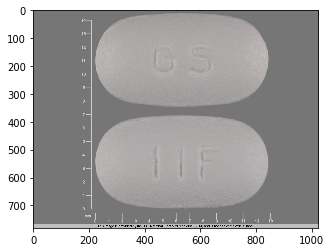

In [32]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/00007-4883-13_DB18ED97.jpg')
plt.imshow(pill_img);

IMAGE 2

In [52]:
photo='009045988.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    #if text['Id'] < 7:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:225
Confidence: 99.75%


Detected text:225
Confidence: 99.75%




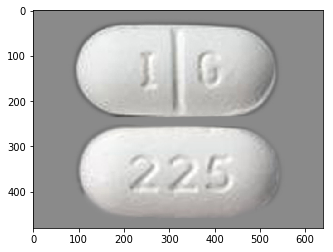

In [53]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/009045988.jpg')
plt.imshow(pill_img);

IMAGE 3

In [54]:
photo='006035484.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:54 84
Confidence: 98.81%


Detected text:V
Confidence: 95.97%


Detected text:V
Confidence: 95.97%


Detected text:54
Confidence: 99.12%


Detected text:84
Confidence: 98.50%




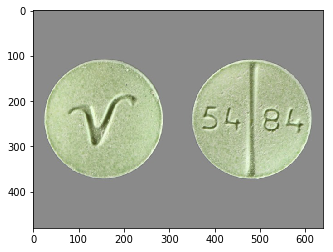

In [55]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/006035484.jpg')
plt.imshow(pill_img);

IMAGE 4

In [56]:
photo='007773107.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:DISTA PROZAC
Confidence: 99.98%


Detected text:40 mg mg
Confidence: 90.95%


Detected text:3107
Confidence: 99.97%


Detected text:PROZAC
Confidence: 99.98%


Detected text:DISTA
Confidence: 99.98%


Detected text:40 mg
Confidence: 91.80%


Detected text:mg
Confidence: 90.11%




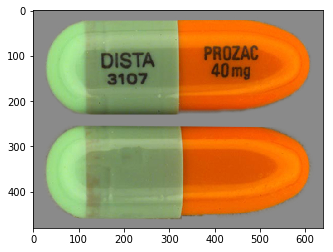

In [57]:
import imageio
import matplotlib.pyplot as plt

pill_img = imageio.imread('./pillbox_images/007773107.jpg')
plt.imshow(pill_img);

### Let's try to manipulate an image from S3 Bucket

We'll try to cut the image in half to split into 2 images 
(To mimic a scenario where a user will send pictures of front and back of pill)

Then we'll seek to read text from each and keep unique pieces of text (but only those with "Confidence" > 85%)

IMAGE 5

In [58]:
photo='007811655.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:PVK 500
Confidence: 99.73%


Detected text:66 950
Confidence: 95.93%


Detected text:PVK
Confidence: 99.68%


Detected text:500
Confidence: 99.79%


Detected text:66
Confidence: 93.53%


Detected text:950
Confidence: 98.32%




### How to get url of file uploaded on AWS S3 bucket?

https://region_name.amazonaws.com/buket_name/object_name

### Getting Image from S3 and Splitting into 2 Images

In [59]:
# Downloading image
s3_resource = boto3.resource('s3')

s3_resource.Object(bucket, photo).download_file(f'./{photo}')

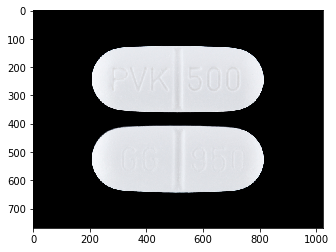

In [60]:
import imageio
import matplotlib.pyplot as plt

pic = imageio.imread('./007811655.jpg')
plt.imshow(pic);

In [61]:
pic.shape

(768, 1024, 3)

In [62]:
height, width = pic.shape[:2]

# Cut the image in half
height_cutoff = height // 2
s1 = pic[:height_cutoff,:]
s2 = pic[height_cutoff:,:]

# Save each half
imageio.imwrite('img1.png', s1)
imageio.imwrite('img2.png', s2)

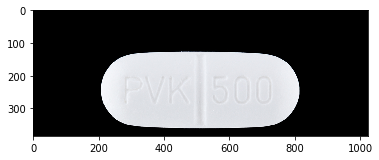

In [63]:
pic1 = imageio.imread('./img1.png')
plt.imshow(pic1);

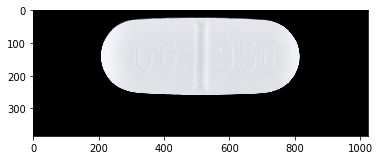

In [64]:
pic2 = imageio.imread('./img2.png')
plt.imshow(pic2);

In [65]:
photo='597620119.jpg'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    if (text['Id'] < 7) & (text['Confidence'] > 85):
        print ('Detected text:' + text['DetectedText'])
        print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
        print('\n')
        # print ('Id: {}'.format(text['Id']))

Detected text
Detected text:PD
Confidence: 97.26%


Detected text:270
Confidence: 99.66%


Detected text:PD
Confidence: 97.26%


Detected text:270
Confidence: 99.66%




In [66]:
import pandas as pd
df_txt  = pd.DataFrame(textDetections)
df_txt = df_txt.drop(['Geometry', 'Id', 'ParentId', 'Type'], axis=1)
df_txt

,Confidence,DetectedText
0,97.256027,PD
1,99.658211,270
2,97.256027,PD
3,99.658211,270


In [67]:
df1 = df_txt.groupby('DetectedText').count()
df1

,Confidence
DetectedText,
270,2
PD,2


### Code to Get Unique Text Sets for Rekognition Dectection

In [68]:
text_found = []
for text in textDetections:
    text_found.append(text['DetectedText'])
text_set = list(set(text_found))
text_set

['PD', '270']

In [69]:
text_found

['PD', '270', 'PD', '270']

## Testing Rekognition with 1 and 2 Sided Test Images

### Uploading Cropped Text Images

- Took images from PillBox and divided them to have 1 image for each side

- Uploaded images into an S3 bucket

In [70]:
import os

img_bucket_name = 'firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

path = './test_images'
# counting files uploaded
# n_count = 0 

# for filename in os.listdir(path):
#     s3_resource.Object(img_bucket_name, 
#                        filename).upload_file(
#                        Filename=f'./test_images/{filename}')
#     n_count += 1

# print(f'Number of files uploaded: {n_count}')

### Reading Text from Test Images

To be read in pairs (Side A & Side B)

#### First Image Test

In [71]:
# Test bucket
bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img7a.JPG', 'img7b.JPG']

# Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
# Will contain a list per side (2 lists)
all_text = []
all_confLevels = []

# Looping through each image in "photo_sides" list
for photo in photo_sides:
    # Detecting Text from Specified Image in S3 Bucket
    response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

    # Detected Text (List of Dictionaries)
    textDetections=response['TextDetections']

    # Parsing Through Detected Text and 
    # Making list of Unique Sets of Text Dectected
    text_found = []
    confLevel_found = []
    
    for text in textDetections:
        text_found.append(text['DetectedText'])
        confLevel = "{:.2f}".format(text['Confidence']) + "%"
        confLevel_found.append(confLevel)
    
    text_set = list(set(text_found))
    # Appending detected text in image to "all_text" list
    all_text.append(text_set)
    all_confLevels.append(confLevel_found)

In [72]:
all_text

[['5/500'], ['5712']]

In [73]:
all_confLevels

[['97.75%', '97.75%'], ['88.60%', '88.60%']]

In [74]:
reversed_text = all_text.copy()
reversed_text.reverse()

In [75]:
reversed_text

[['5712'], ['5/500']]

#### Second Image Test

Here It throws varying results.

Will need to Limit results not just based on **"unique" text blobs** but also based on **confidence level**

In [76]:
# Test bucket
bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img4a.JPG', 'img4b.JPG']

# Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
# Will contain a list per side (2 lists)
all_text = []
all_confLevels = []

# Looping through each image in "photo_sides" list
for photo in photo_sides:
    # Detecting Text from Specified Image in S3 Bucket
    response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

    # Detected Text (List of Dictionaries)
    textDetections=response['TextDetections']

    # Parsing Through Detected Text and 
    # Making list of Unique Sets of Text Dectected
    text_found = []
    confLevel_found = []
    
    for text in textDetections:
        if text['Confidence'] > 87:
            text_found.append(text['DetectedText'])
            confLevel = "{:.2f}".format(text['Confidence']) + "%"
            confLevel_found.append(confLevel)
    
    #text_set = list(set(text_found))
    # Appending detected text in image to "all_text" list
    all_text.append(text_found)
    all_confLevels.append(confLevel_found)

In [77]:
all_text

[[], ['1003']]

Confidence levels are higher for two 'S's and '1003'. Both above 85%

In [78]:
all_confLevels

[[], ['92.88%']]

#### Third Image Test

In [79]:
# Test bucket
bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=['img4a.JPG', 'img4b.JPG']

# Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
# Will contain a list per side (2 lists)
all_text = []
all_confLevels = []

# Looping through each image in "photo_sides" list
for photo in photo_sides:
    # Detecting Text from Specified Image in S3 Bucket
    response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

    # Detected Text (List of Dictionaries)
    textDetections=response['TextDetections']

    # Parsing Through Detected Text and 
    # Making list of Unique Sets of Text Dectected
    text_found = []
    confLevel_found = []
    
    for text in textDetections:
        if text['Confidence'] > 85:
            text_found.append(text['DetectedText'])
            confLevel = "{:.2f}".format(text['Confidence']) + "%"
            confLevel_found.append(confLevel)
    
    #text_set = list(set(text_found))
    # Appending detected text in image to "all_text" list
    all_text.append(text_found)
    all_confLevels.append(confLevel_found)

In [80]:
all_text

[['S', 'S'], ['1003']]

In [81]:
all_confLevels

[['85.30%', '85.30%'], ['92.88%']]

In [82]:
import re

all_split_text = []
for text_list in all_text:
    if len(text_list) > 0:
        for text in text_list:
            text_split = re.split('(\D+)', text)
            all_split_text.append(text_split)

unique_list = []
for each in all_split_text:
    unique_list.append([i for i in each if i])
    
unique_list

[['S'], ['S'], ['1003']]

Flattening list of lists returned:

In [83]:
text_list = [blob for sublist in all_text for blob in sublist]
text_list = list(set(text_list))
text_list

['1003', 'S']

List of text blobs split where digits and letters are together:

In [84]:
unique_list = []
for each in text_list:
    num_split = re.findall(r'[A-Za-z]+|\d+', each)
    unique_list.append(num_split)
    
unique_list = [blob for sublist in unique_list for blob in sublist]
unique_list

['1003', 'S']

### Now as a Function

In [85]:
import json

In [86]:
# Text  Dectection Function
def text_detection(filename_list):
    
    #THIS IS A TEST BUCKET
    bucket='firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad'

    # Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
    # Will contain a list per side (2 lists)
    all_text = []

    # Looping through each image in "photo_sides" list
    for file in filename_list:
        # Detecting Text from Specified Image in S3 Bucket
        response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':file}})

        # Detected Text (List of Dictionaries)
        textDetections=response['TextDetections']

        # Parsing Through Detected Text and 
        # Making list of Unique Sets of Text Dectected
        text_found = []

        for text in textDetections:
            if text['Confidence'] > 87:
                text_found.append(text['DetectedText'])

        text_set = list(set(text_found))
        
        # Appending detected text in image to "all_text" list
        all_text.append(text_set)
        
    # Flattening 'all_text' (list of lists) into 1 list
    text_list = [blob for sublist in all_text for blob in sublist]
    text_list = list(set(text_list))
    # print(f'text_list: {text_list}')
    
    # Splitting any text blob that may have digits and numbers together
    unique_list = []
    for each in text_list:
        num_split = re.findall(r'[A-Za-z]+|\d+', each)
        unique_list.append(num_split)
        
    # Flattening again into one list with just unique values
    unique_list = [blob for sublist in unique_list for blob in sublist]
    unique_list = list(set(unique_list))
    # print(len(unique_list))
    
    if len(unique_list) == 0:
        unique_list = ['Unable to detect text']
    
    # Return 'unique_list' as JSON    
    return json.dumps(unique_list)

### Function Detecting Text from URL Image

This takes 1 image at the time - assuming each url would be an image

In [87]:
# test_url = "http://www.gunnerkrigg.com//comics/00000001.jpg"

In [8]:
from skimage.exposure import rescale_intensity
from skimage import color
import urllib.request
import json
import re
import boto3
import numpy as np
client=boto3.client('rekognition')

In [81]:
# Text  Dectection Function
def post_rekog(pic_json):
    
    # Getting list of image file names
    imageURL_list = pic_json.get("image_locations")
    # print(f'imageURL_list {imageURL_list}')
    
    # Empty list to contain list(s) of text blob(s) extracted with "Rekognition"
    # Will contain a list per side (2 lists)
    all_text = []
    
    # Looping through each image
    for imageURL in imageURL_list:
        if imageURL != "":
            # Saving image URL locally
            urllib.request.urlretrieve(imageURL, "00000001.jpg")
            imageFile='./00000001.jpg'
            # print(f'imageFile: {imageFile}')
            
            # Opening locally saved 'imageFile'
            with open(imageFile, 'rb') as image:
                response = client.detect_text(Image={'Bytes': image.read()})

            # Detected Text (List of Dictionaries)
            textDetections=response['TextDetections']

            # Parsing Through Detected Text and 
            # Making list of Unique Sets of Text Dectected
            text_found = []

            for text in textDetections:
                if text['Confidence'] > 87:
                    text_found.append(text['DetectedText'])
                    # print(text['Confidence'])
            # print(f'text_found: {text_found}')
            
            text_set = list(set(text_found))

            # Appending detected text in image to "all_text" list
            all_text.append(text_set)
        
        else:
            continue
            
    # Flattening 'all_text' (list of lists) into 1 list
    text_list = [blob for sublist in all_text for blob in sublist]
    text_list = list(set(text_list))
    # print(f'text_list: {text_list}')

    # Splitting any text blob that may have digits and numbers together
    unique_list = []
    for each in text_list:
        num_split = re.findall(r'[A-Za-z]+|\d+', each)
        unique_list.append(num_split)

    # Flattening again into one list with just unique values
    unique_list = [blob for sublist in unique_list for blob in sublist]
    unique_list = list(set(unique_list))
    # print(len(unique_list))

    if len(unique_list) == 0:
        unique_list = ['Unable to detect text']

    # Return 'unique_list' as JSON    
    return json.dumps(unique_list)
    


### Passing image pairs into `text_detection` function

#### Testing function on URL!

In [71]:
# Cannot detect text in this pill
test_url = {"image_locations": ["./test_images/img4a.JPG"]}

post_rekog(test_url)

imageFile: ./test_images/img4a.JPG


'["Unable to detect text"]'

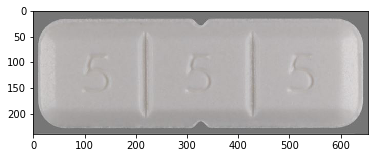

In [72]:
import imageio
pic1 = imageio.imread('./test_images/img4a.JPG')
pic2 = imageio.imread('./test_images/img4b.JPG')
plt.imshow(pic1);

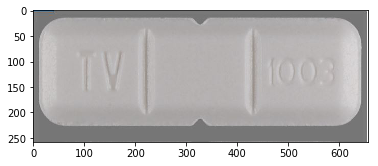

In [48]:
plt.imshow(pic2);

In [82]:
# Cannot detect text in this pill
test_url = {"image_locations": ["https://raw.githubusercontent.com/ed-chin-git/ed-chin-git.github.io/master/sample_pill_image.jpg", ""]}

post_rekog(test_url)

'["H", "126"]'

In [27]:
# Cannot detect text in this pill
test_url = {"image_file":"https://s3.amazonaws.com/labs12-rxidstore/reference/00074-7068-19_A31D51AA.jpg"}
# type(test_url)
post_rekog(test_url)

['and', 'is', 'not', 'parto']
['f', 'the']
['6']
['12']
['Medicine']
['Library', 'of']
['image', 'is']
['10']
['official']
['NLM']
['label']
['mm']
['This', 'image', 'is', 'sprovided', 'by', 'the', 'U', 'S', 'Nationall', 'Library', 'of', 'Medicine', 'NLM', 'and', 'is', 'not', 'parto', 'f', 'the', 'official', 'label']
['sprovided', 'by']
['the']
['This']
['1']
['Nationall']
['15']
['U', 'S']


'["sprovided", "image", "is", "NLM", "the", "This", "Nationall", "6", "official", "S", "and", "1", "label", "15", "12", "not", "f", "parto", "Medicine", "U", "10", "mm", "by", "of", "Library"]'

In [25]:
test_url = {"image_file":"https://s3.amazonaws.com/labs12-rxidstore/reference/00002-3228-30_391E1C80.jpg"}
print(test_url.get("image_file"))

https://s3.amazonaws.com/labs12-rxidstore/reference/00002-3228-30_391E1C80.jpg


In [ ]:
# test_url = "http://www.gunnerkrigg.com//comics/00000001.jpg"
test_url = {"image_file":"https://s3.amazonaws.com/labs12-rxidstore/reference/00002-3228-30_391E1C80.jpg"}

url_text_detection(test_url)

In [24]:
# Erroneous text --> "COSTAS"
test_url = 'https://s3.us-east-2.amazonaws.com/firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad/img6a.JPG'

url_text_detection(test_url)

'["DS", "COSTAS"]'

In [23]:
# this side of the pill is without text
test_url = 'https://s3.us-east-2.amazonaws.com/firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad/img2b.JPG'

url_text_detection(test_url)

'["Unable to detect text"]'

In [26]:
# this side of the pill is without text
test_url = 'https://s3.us-east-2.amazonaws.com/firstpythonbucketac60bb97-95e1-43e5-98e6-0ca294ec9aad/img5b.JPG'

url_text_detection(test_url)

'["10", "I", "mg", "4339"]'

### Trying to turn 'imageFile' to grayscale

In [ ]:
# Trying to turn 'imageFile' to grayscale
# urllib.request.urlretrieve(test_url, "00000001.jpg")
imageFile='./00000001.jpg'

photo = imageio.imread(imageFile)
bw_photo = rescale_intensity(color.rgb2gray(photo))
bw_photo = bw_photo.astype(np.uint8)

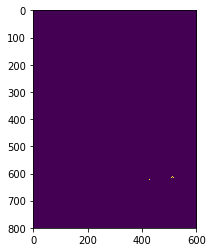

In [63]:
plt.imshow(bw_photo);

#### Testing function on `img3a.JPG` and `img3b.JPG`

NEED TO RETURN NONE OR SOMETHING ALIKE WHEN STRING IN LIST IS < 1  
==>>> For this image it only reads one digit! ('9') but with confidence below 87%

In [ ]:
# Will need to take the JSON object and extract the 1 or 2 filenames
# then pass them into a variable as a list
photo_sides=["00002-4462-30_B215591A.jpg"]

text_detection(photo_sides)

TypeError: Image data cannot be converted to float

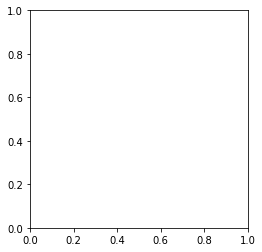

In [65]:
pic_img3a = imageio.imread('./test_images/img3a.JPG')
bw_pic = rescale_intensity(color.rgb2gray(pic_img3a))
bw_pic = bw_photo.astype(np.uint8)
imageio.imwrite('./bw_img3a.jpg', bw_photo)
bw_img3a = './bw_img3a.jpg'
plt.imshow(bw_img3a);

For 'img3a.JPG' it does not detect anything

In [53]:
photo='img3a.JPG'

response=client.detect_text(Image={'S3Object':{'Bucket':bucket,'Name':photo}})

textDetections=response['TextDetections']
print ('Detected text')
for text in textDetections:
    print ('Detected text:' + text['DetectedText'])
    print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
    print('\n')
    # print ('Id: {}'.format(text['Id']))

Detected text


#### Testing function on img4a.JPG and img4b.JPG

In [95]:
photo_sides=['img4a.JPG', 'img4b.JPG']

text_detection(photo_sides)

'["1003"]'

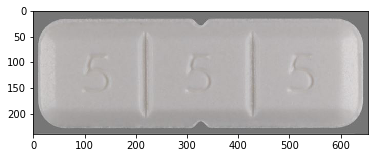

In [76]:
pic_img4a = imageio.imread('./test_images/img4a.JPG')
pic_img4b = imageio.imread('./test_images/img4b.JPG')
plt.imshow(pic_img4a);

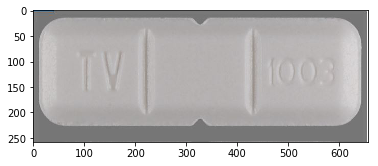

In [77]:
plt.imshow(pic_img4b);

#### Testing function on img6a.JPG and img6b.JPG

In [96]:
photo_sides=['img6a.JPG', 'img6b.JPG']

text_detection(photo_sides)

'["COSTAS", "DS"]'

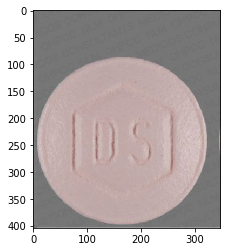

In [84]:
pic_img6a = imageio.imread('./test_images/img6a.JPG')
pic_img6b = imageio.imread('./test_images/img6b.JPG')
plt.imshow(pic_img6a);

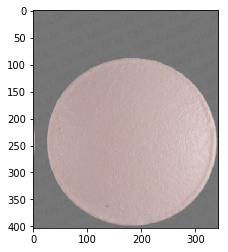

In [85]:
plt.imshow(pic_img6b);

In [ ]:
plt.imshow(pic_img1a);

#### Testing function on img1a.JPG and img1b.JPG

In [90]:
photo_sides=['img1a.JPG', 'img1b.JPG']

text_detection(photo_sides)

4


'["950", "PVK", "66", "500"]'

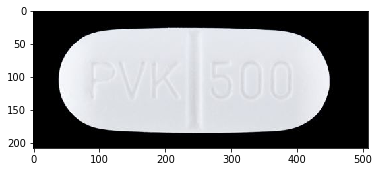

In [79]:
pic_img1a = imageio.imread('./test_images/img1a.JPG')
pic_img1b = imageio.imread('./test_images/img1b.JPG')
plt.imshow(pic_img1a);

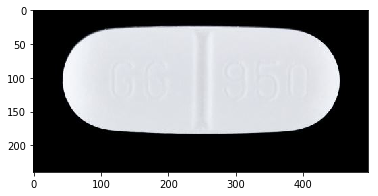

In [80]:
plt.imshow(pic_img1b);

In [66]:
# Testing on just 1 image - in case only 1 is submitted by user
photo_sides=['img1a.JPG']

text_detection(photo_sides)

'["PVK", "500"]'

Will turning the Object from S3 into grayscale help?

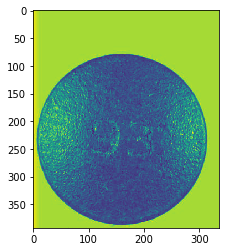

In [36]:
from skimage.exposure import rescale_intensity
from skimage import color
obj_key = 'img3a.JPG'
obj = s3_resource.Object(bucket, obj_key)
obj_body = obj.get()['Body'].read()

photo = imageio.imread(obj_body)
bw_photo = rescale_intensity(color.rgb2gray(photo))

plt.imshow(bw_photo);

### AWS --> Analyzing an Image Loaded from a Local File System

https://docs.aws.amazon.com/rekognition/latest/dg/images-bytes.html

The following AWS SDK for Python example shows how to load an image from the local file system and call the detect_labels operation. Change the value of imageFile to the path and file name of an image file (.jpg or .png format).

```
import boto3

if __name__ == "__main__":

    imageFile='input.jpg'
    client=boto3.client('rekognition')
   
    with open(imageFile, 'rb') as image:
        response = client.detect_labels(Image={'Bytes': image.read()})
        
    print('Detected labels in ' + imageFile)    
    for label in response['Labels']:
        print (label['Name'] + ' : ' + str(label['Confidence']))

    print('Done...')

```

In [98]:
'https://s3.amazonaws.com/rxid-images/uploads/00002-4462-30_B215591A.jpg'

'https://s3.amazonaws.com/rxid-images/uploads'

#### Detecting text from local image

In [113]:
imageFile='./test_images/img1a.JPG'

with open(imageFile, 'rb') as image:
    response = client.detect_text(Image={'Bytes': image.read()})
        
print('Detected labels in ' + imageFile)    
for text in response['TextDetections']:
    print (text['DetectedText'] + ' : ' + str(text['Confidence']))


# textDetections=response['TextDetections']
# print ('Detected text')
# for text in textDetections:
#     print ('Detected text:' + text['DetectedText'])
#     print ('Confidence: ' + "{:.2f}".format(text['Confidence']) + "%")
#     print('\n')
    # print ('Id: {}'.format(text['Id']))

Detected labels in ./test_images/img1a.JPG
PVK 500 : 99.77644348144531
PVK : 99.7018051147461
500 : 99.85108184814453


#### Detecting text from ulr image

In [112]:
import urllib.request
...
# Download the file from `url` and save it locally under `file_name`:
urllib.request.urlretrieve("http://www.gunnerkrigg.com//comics/00000001.jpg", "00000001.jpg")
imageFile='./00000001.jpg'

with open(imageFile, 'rb') as image:
    response = client.detect_text(Image={'Bytes': image.read()})
        
print('Detected labels in ' + imageFile)    
for text in response['TextDetections']:
    print (text['DetectedText'] + ' : ' + str(text['Confidence']))


Detected labels in ./00000001.jpg
my name 1S antimony Carver. : 93.6610336303711
I you would the strange Like to Share events with that : 98.34669494628906
took place while I attensed : 94.3223648071289
school at... : 95.68437957763672
Gurrerkirigg : 79.4805908203125
unNerkrigg : 92.02403259277344
Cour : 94.61329650878906
ourt : 94.80799102783203
Chapter l: : 93.08468627929688
The Shadou and The Robot : 98.51530456542969
By: : 99.61348724365234
Tom Siddell : 99.75839233398438
my : 99.14251708984375
name : 99.74283599853516
1S : 74.47908020019531
antimony : 99.76407623291016
Carver. : 95.1766586303711
I : 98.92041778564453
would : 97.28533172607422
Like : 94.5663070678711
to : 97.26721954345703
Share : 96.84077453613281
with : 99.25309753417969
you : 99.36241149902344
the : 99.6290054321289
strange : 99.57170104980469
events : 99.58352661132812
that : 99.53378295898438
took : 99.6881103515625
place : 87.55908966064453
while : 91.64098358154297
I : 96.14089965820312
attensed : 96.5827560